In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format = "-"):
    plt.figure(figsize=(10,6))
    plt.plot(time, series, format)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)

In [3]:
def trend(time, slope = 0):
    return slope*time

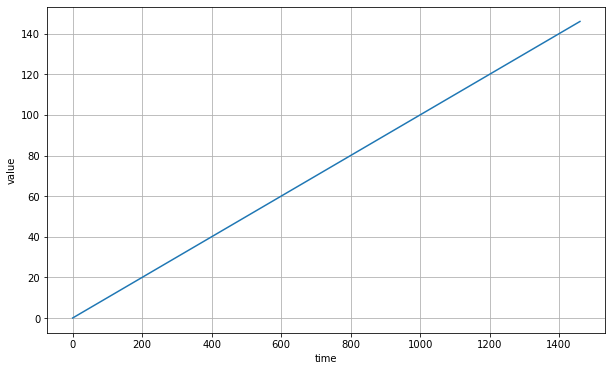

In [4]:
time = np.arange(4*365+1)
baseline= 10
series = trend(time, 0.1)
plot_series(time, series)
plt.show()

In [5]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time*2*np.pi),
                    1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

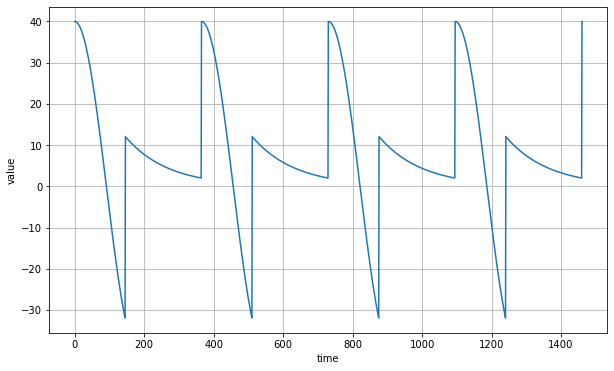

In [6]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

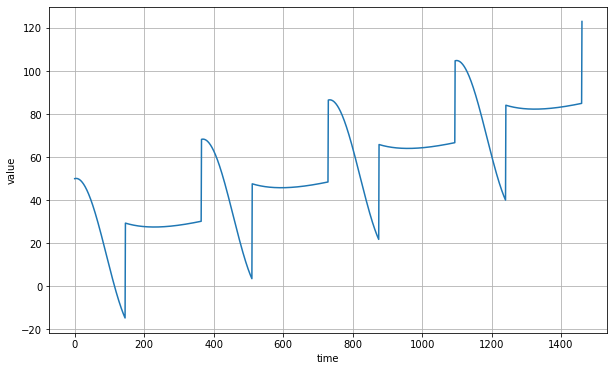

In [7]:
slope = 0.05 
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude)
plot_series(time, series)
plt.show()

In [8]:
def noise(time, noise_level=1, seed = None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

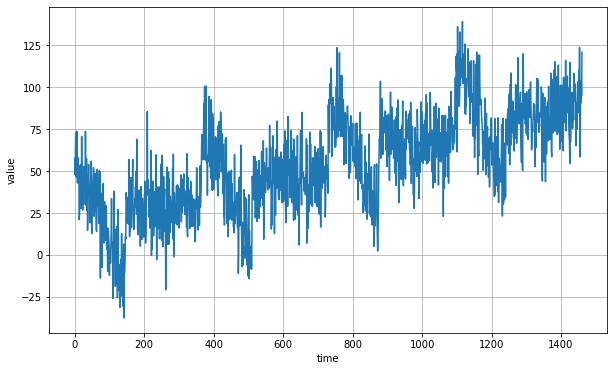

In [9]:
noise_level = 15
noisy_series = series + noise(time, noise_level, seed=42)
plot_series(time, noisy_series)
plt.show()

In [10]:
def autocorrelation(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    phi_1 = 0.5
    phi_2 = -0.1
    ar = rnd.randn(len(time)+50)
    ar[:50] = 100
    for step in range(50, len(time)+50):
        ar[step] += phi_1*ar[step-50]
        ar[step] += phi_2*ar[step-33]
    return ar[50:]*amplitude

In [11]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    phi = 0.8
    ar = rnd.randn(len(time)+1)
    for step in range(1, len(time)+1):
        ar[step] += phi*ar[step-1]
    return ar[1:]*amplitude

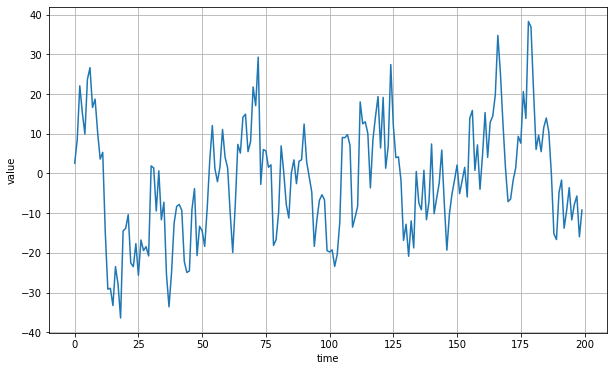

In [12]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

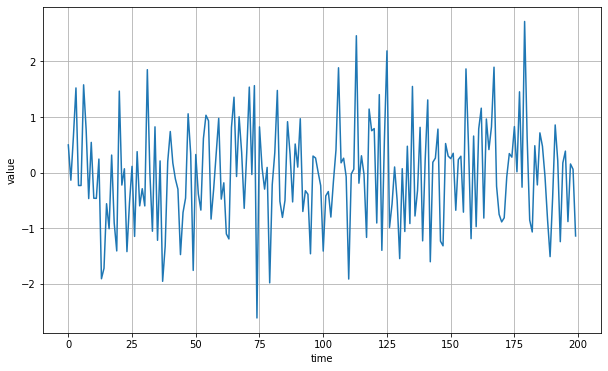

In [13]:
series = noise(time, seed=42)
plot_series(time[:200], series[:200])
plt.show()

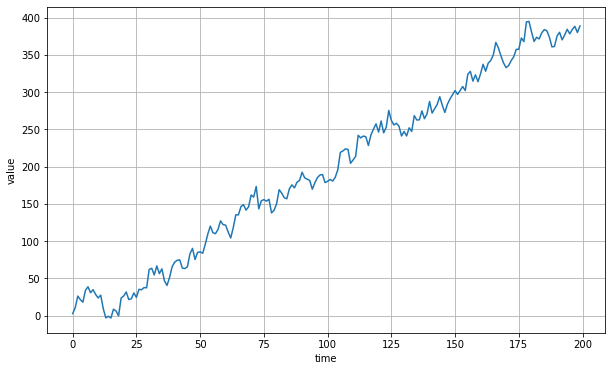

In [14]:
series = autocorrelation(time, 10, seed = 42)+ trend(time,2)
plot_series(time[:200], series[:200])
plt.show()

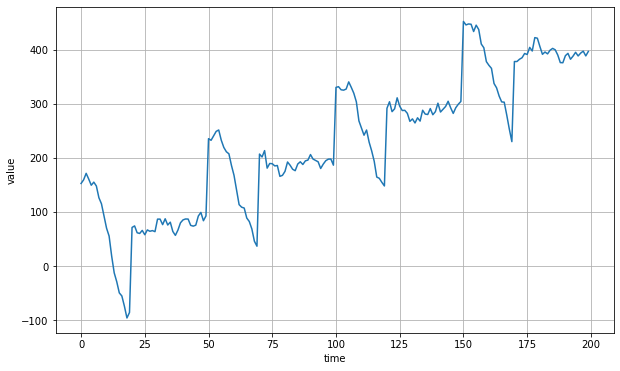

In [15]:
series = autocorrelation(time, 10, seed=42) + seasonality (time, period = 50, amplitude =150) + trend(time,2)
plot_series(time[:200], series[:200])
plt.show()

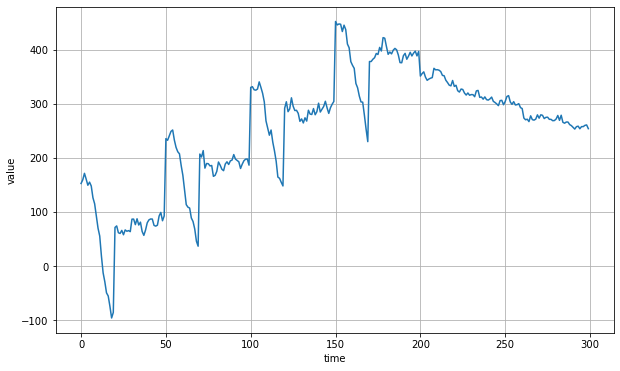

In [16]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

In [17]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series    

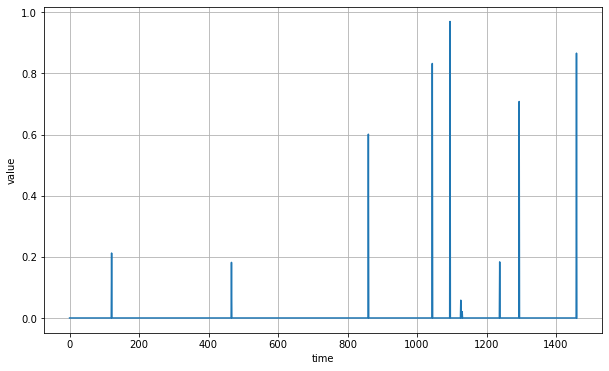

In [18]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [19]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
                ar[step] += φ * ar[step - lag]
    return ar

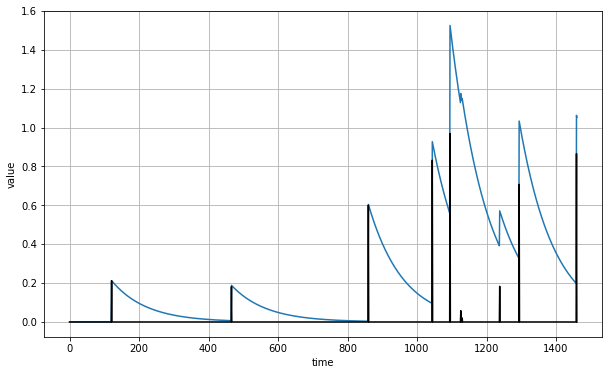

In [20]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

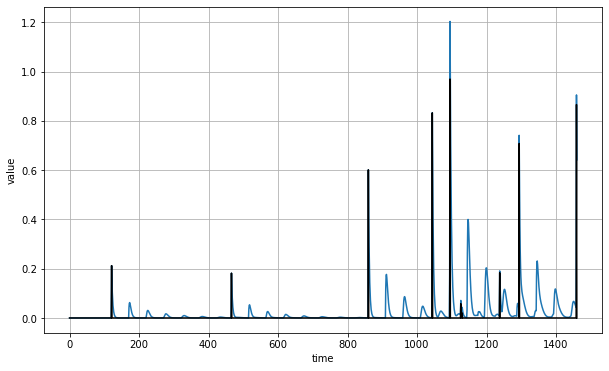

In [21]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

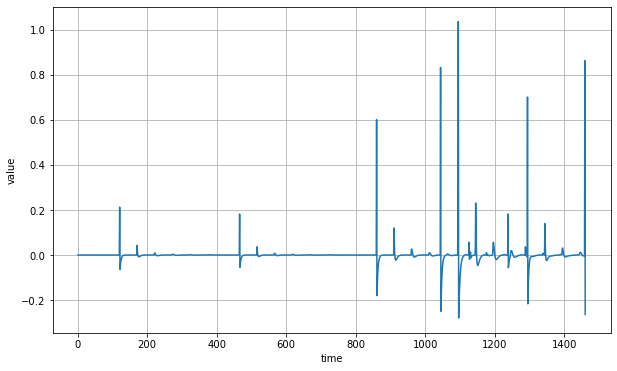

In [22]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

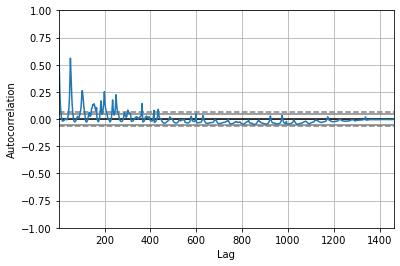

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Mon, 29 Mar 2021   AIC                          -4432.855
Time:                        08:23:10   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0